In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing numpy library
import numpy as np

In [0]:
#each samples is a sentence
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [0]:
#for tokenizing the samples
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

In [0]:
#each sample will have the max length as defined
max_length = 10

In [0]:
#for storing the results
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))

In [0]:
#for creating the matrix
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [0]:
import string

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [0]:
#all printable ASCII characters
characters = string.printable

In [0]:
token_index = dict(zip(range(1, len(characters) + 1), characters))

In [0]:
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

In [18]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [0]:
#for taking only 1000 common words
tokenizer = Tokenizer(num_words=1000)

In [0]:
#builds the word index
tokenizer.fit_on_texts(samples)

In [0]:
#turns strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)

In [0]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [25]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [0]:
dimensionality = 1000
max_length = 10

In [0]:
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

In [0]:
from keras.layers import Embedding

In [30]:
#1000 possible tokens, 64dimensionality result embeddings
embedding_layer = Embedding(1000, 64)

In [0]:
# import imdb dataset which has positive and negative reviews
from keras.datasets import imdb
from keras import preprocessing

In [0]:
# we are taking 10000 words and max length per review will be 20
max_features = 10000
maxlen = 20

In [33]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# we are padding the reviews with max length
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)

In [0]:
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [36]:
# we are converting each review with max length 20 to the new dimensionality 8.
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 12s 586us/step - loss: 0.6707 - acc: 0.6205 - val_loss: 0.6226 - val_acc: 0.6946
Epoch 2/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.5447 - acc: 0.7467 - val_loss: 0.5268 - val_acc: 0.7294
Epoch 3/10
20000/20000 [==============================] - 2s 99us/step - loss: 0.4627 - acc: 0.7884 - val_loss: 0.5007 - val_acc: 0.7470
Epoch 4/10
20000/20000 [==============================] - 2s 98us/step - loss: 0.4228 - acc: 0.8086 - val_loss: 0.4916 - val_acc: 0.7548
Epoch 5/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.3954 - acc: 0.8240 - val_loss: 0.4911 - val_acc: 0.7620
Epoch 6/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.3733 - acc: 0.8354 - val_loss: 0.4923 - val_acc: 0.7602
Epoch 7/10
20000/20000 [==============================] - 2s 99us/step - loss: 0.3529 - acc: 0.8488 - val_loss: 0.49

## Download the dataset and glove pre-trained embeddings and uploaded to Gdrive.

In [0]:
import os

In [0]:
!unzip -q "/content/drive/My Drive/aclImdb.zip"

In [0]:
imdb_dir = '/content/aclImdb'

In [0]:
train_dir = os.path.join(imdb_dir,'train')

In [0]:
labels = []
texts = []

In [0]:
# this part is for tagging the positive and negative labels to the dataset
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
      if fname[-4:] == '.txt':
        f = open(os.path.join(dir_name, fname))
        texts.append(f.read())
        f.close()
        if label_type == 'neg':
          labels.append(0)
        else:
          labels.append(1)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [0]:
# here max length is 100 and changed the training samples from 200 to 8000
maxlen = 100
training_samples = 8000

In [0]:
# we are taking the max 10000 words from the trained 400k Glove words
validation_samples = 10000
max_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [48]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [0]:
data = pad_sequences(sequences, maxlen=maxlen)

In [50]:
# we will be shuffling the dataset since it has continous positive and negative reviews.
# also we are splitting the dataset.

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [0]:
#unzipped the glove model and given directory path

!unzip -q "/content/drive/My Drive/glove.6B.zip"
glove_dir = '/content/'

In [52]:
#we are loading 100Dimensions text data and it will be 400k words
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
# if the words are not in glove index, it will be assigned as zero vector

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [54]:
#Each word in sample will be converted into 100dimension, so it will be 100*100

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [57]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 187us/step - loss: 0.7182 - acc: 0.5511 - val_loss: 0.6419 - val_acc: 0.6337
Epoch 2/10
8000/8000 [==============================] - 1s 175us/step - loss: 0.6080 - acc: 0.6779 - val_loss: 0.5901 - val_acc: 0.6847
Epoch 3/10
8000/8000 [==============================] - 1s 165us/step - loss: 0.5135 - acc: 0.7489 - val_loss: 0.7619 - val_acc: 0.5970
Epoch 4/10
8000/8000 [==============================] - 1s 168us/step - loss: 0.4475 - acc: 0.7908 - val_loss: 0.5773 - val_acc: 0.6963
Epoch 5/10
8000/8000 [==============================] - 1s 163us/step - loss: 0.3792 - acc: 0.8293 - val_loss: 0.7918 - val_acc: 0.6529
Epoch 6/10
8000/8000 [==============================] - 1s 161us/step - loss: 0.3159 - acc: 0.8698 - val_loss: 0.6959 - val_acc: 0.6700
Epoch 7/10
8000/8000 [==============================] - 1s 172us/step - loss: 0.2554 - acc: 0.8946 - val_loss: 0.7216 - val_acc: 0.6951

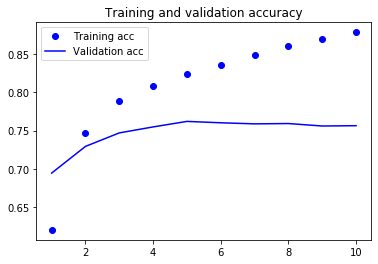

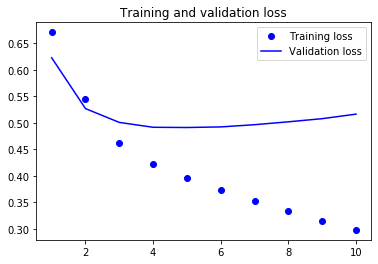

In [56]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [59]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 227us/step - loss: 0.5463 - acc: 0.7095 - val_loss: 0.3859 - val_acc: 0.8236
Epoch 2/10
8000/8000 [==============================] - 1

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [0]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [62]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 51us/step


[0.9035524316120148, 0.6852]